<a href="https://colab.research.google.com/github/arielwendichansky/DI_Bootcamp/blob/master/Week6/Day2/daily_challenge/energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.graph_objects as go
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder


#Download data and understanding this

In [54]:
!unzip 'global_power_plant_database_v_1_3.zip'
df = pd.read_csv('global_power_plant_database.csv')
df.head()

Archive:  global_power_plant_database_v_1_3.zip
replace A_Global_Database_of_Power_Plants.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


<ipython-input-54-f31ef1201f41>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('global_power_plant_database.csv')


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [ ]:
print(f"There are {len(df)} rows in the file\n")
print("The cells without values are the following\n")
print(df.isnull().sum())
print("\nDescription about each column\n")
print(df.info())


#Preprocessing the data

In [4]:
cdata = df.copy()
print(df.duplicated().sum())


0


In [5]:
selected_columns = ['other_fuel1','other_fuel2','other_fuel3','url', 'gppd_idnr','wepp_id','year_of_capacity_data','generation_data_source',
                    'estimated_generation_note_2013','estimated_generation_note_2014','estimated_generation_note_2015',
                    'estimated_generation_note_2016','estimated_generation_note_2017']
cdata.drop(columns = selected_columns,inplace=True )

In [6]:
cdata['commissioning_year'] = pd.to_datetime(cdata['commissioning_year']).dt.year

In [7]:
cdata.describe().T


,count,mean,std,min,25%,50%,75%,max
capacity_mw,34936.0,163.355148,489.636072,1.0000,4.900000,16.745000,75.344250,22500.0000
latitude,34936.0,32.816637,22.638603,-77.8470,29.256475,39.727750,46.263125,71.2920
longitude,34936.0,-6.972803,78.405850,-179.9777,-77.641550,-2.127100,49.502675,179.3887
commissioning_year,17447.0,1970.000000,0.000000,1970.0000,1970.000000,1970.000000,1970.000000,1970.0000
generation_gwh_2013,6417.0,592.696107,2174.833482,-947.6000,1.947000,23.426000,199.706000,50834.0000
generation_gwh_2014,7226.0,656.863891,2231.464288,-989.6190,2.260000,23.608500,226.322250,32320.9170
generation_gwh_2015,8203.0,762.368840,2533.459828,-864.4280,2.664500,26.142000,285.862583,37433.6070
generation_gwh_2016,9144.0,693.149763,2404.516759,-768.6200,2.729000,22.462389,249.866750,32377.4770
generation_gwh_2017,9500.0,661.834161,2369.296957,-934.9440,2.467000,17.876500,214.505150,36448.6430
generation_gwh_2018,9637.0,517.320785,1975.302686,-982.6220,2.242000,12.530000,151.117000,35136.0000


In [23]:
rows_with_missing_values = cdata[cdata.isnull().any(axis=1)]
rows_with_missing_values

,country,country_long,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,...,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.3220,65.1190,Hydro,NaN,NaN,GEODB,...,NaN,NaN,NaN,NaN,NaN,123.77,162.90,97.39,137.76,119.50
1,AFG,Afghanistan,Kandahar DOG,10.0,31.6700,65.7950,Solar,NaN,NaN,Wiki-Solar,...,NaN,NaN,NaN,NaN,NaN,18.43,17.48,18.25,17.70,18.29
2,AFG,Afghanistan,Kandahar JOL,10.0,31.6230,65.7920,Solar,NaN,NaN,Wiki-Solar,...,NaN,NaN,NaN,NaN,NaN,18.64,17.58,19.10,17.62,18.72
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.5560,69.4787,Hydro,NaN,NaN,GEODB,...,NaN,NaN,NaN,NaN,NaN,225.06,203.55,146.90,230.18,174.91
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.6410,69.7170,Hydro,NaN,NaN,GEODB,...,NaN,NaN,NaN,NaN,NaN,406.16,357.22,270.99,395.38,350.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34931,ZMB,Zambia,Ndola,50.0,-12.9667,28.6333,Oil,NaN,ZESCO,Energy Regulation Board of Zambia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183.79
34932,ZMB,Zambia,Nkana,20.0,-12.8167,28.2000,Oil,NaN,ZESCO,Energy Regulation Board of Zambia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.51
34933,ZMB,Zambia,Victoria Falls,108.0,-17.9167,25.8500,Hydro,NaN,ZESCO,Energy Regulation Board of Zambia,...,NaN,NaN,NaN,NaN,NaN,575.78,575.78,548.94,579.90,578.32
34934,ZWE,Zimbabwe,Hwange Coal Power Plant Zimbabwe,920.0,-18.3835,26.4700,Coal,NaN,NaN,GEODB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2785.10


Understanding what I can see from those rows where there's no information about the generation of energy for every year. I can see that in most of the cases, no information can be taken from this, therefor I will proceed to drop them.
By doing this only power stations from the US remains

In [ ]:
# columns_na = ['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
#               'generation_gwh_2017','generation_gwh_2018','generation_gwh_2019']
# cdata.dropna(subset=columns_na, inplace=True)
# cdata.isnull().sum()

In [20]:
energy_gen_columns = ['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
                      'generation_gwh_2017','generation_gwh_2018','generation_gwh_2019']
energy_est_columns = ['estimated_generation_gwh_2013',
                      'estimated_generation_gwh_2014','estimated_generation_gwh_2015','estimated_generation_gwh_2016', 'estimated_generation_gwh_2017']
source_group = cdata.groupby('primary_fuel')[energy_gen_columns].count()
source_group

,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
primary_fuel,,,,,,,
Biomass,126,136,149,165,156,154,152
Coal,303,460,602,608,594,481,282
Cogeneration,28,29,30,32,32,32,33
Gas,1661,1742,1924,1920,1933,1851,1775
Geothermal,58,59,62,64,63,63,65
Hydro,1447,1615,1764,1952,1776,1653,1419
Nuclear,58,65,106,108,109,66,58
Oil,785,784,821,846,832,842,837
Other,14,14,17,16,17,15,15


In [25]:
cdata.isnull().sum()

country                              0
country_long                         0
name                                 0
capacity_mw                          0
latitude                             0
longitude                            0
primary_fuel                         0
commissioning_year               17489
owner                            14068
source                              15
geolocation_source                 419
generation_gwh_2013              28519
generation_gwh_2014              27710
generation_gwh_2015              26733
generation_gwh_2016              25792
generation_gwh_2017              25436
generation_gwh_2018              25299
generation_gwh_2019              25277
estimated_generation_gwh_2013    18816
estimated_generation_gwh_2014    18433
estimated_generation_gwh_2015    17886
estimated_generation_gwh_2016    17366
estimated_generation_gwh_2017     1798
dtype: int64

In [24]:
# Calculate the mean for each row energy generation
row_means = cdata[energy_gen_columns].mean(axis=1)
# Fill missing values in row_means with 0
row_means.fillna(0, inplace=True)

row_means_est = cdata[energy_est_columns].mean(axis=1)
# Fill missing values in row_means_est with 0
row_means_est.fillna(0, inplace=True)

# Fill missing values with respective row means
cdata[energy_gen_columns] = cdata[energy_gen_columns].fillna(row_means, axis=0)
cdata[energy_est_columns] = cdata[energy_est_columns].fillna(row_means_est, axis=0)


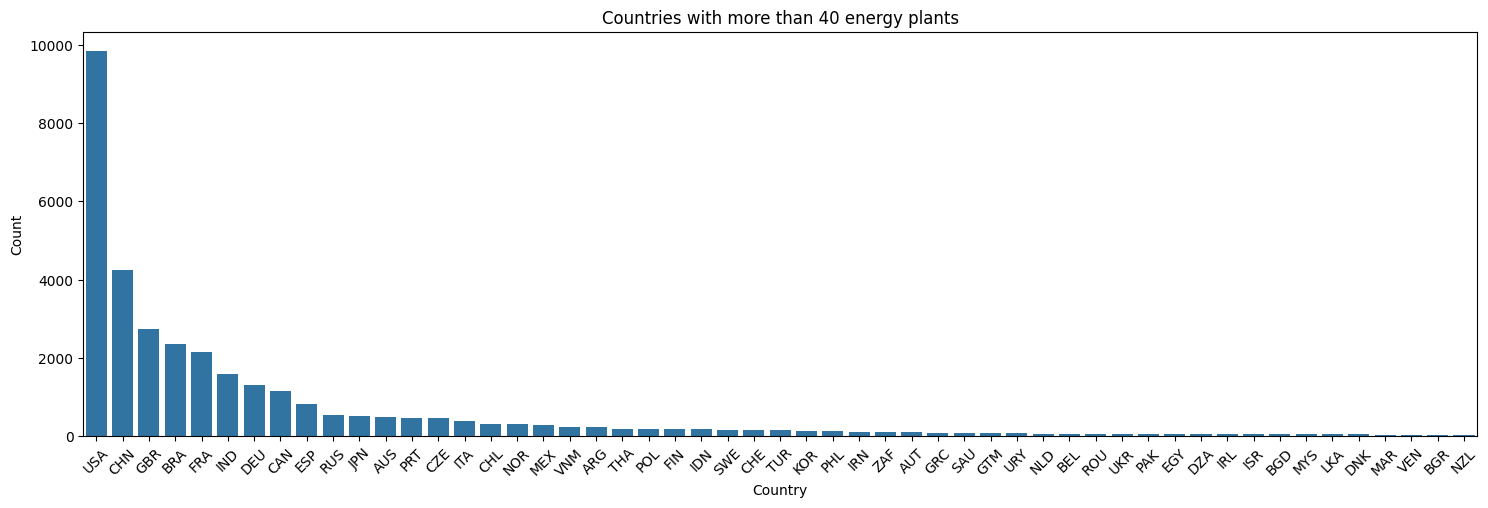

In [43]:
plt.figure(figsize=(15,5))

# Sort the DataFrame by the 'country' column
sorted_cdata = cdata['country'].value_counts().reset_index().rename(columns={'index': 'country', 'country': 'country'})

# Filtering countries with more than 40 energy plants
sorted_cdata_top = sorted_cdata[sorted_cdata['count']>40]

# Create the count plot with sorted data
ax = sns.barplot(data=sorted_cdata_top, x='country', y='count')


plt.xlabel('Country')
plt.ylabel('Count')
plt.title("Countries with more than 40 energy plants")

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

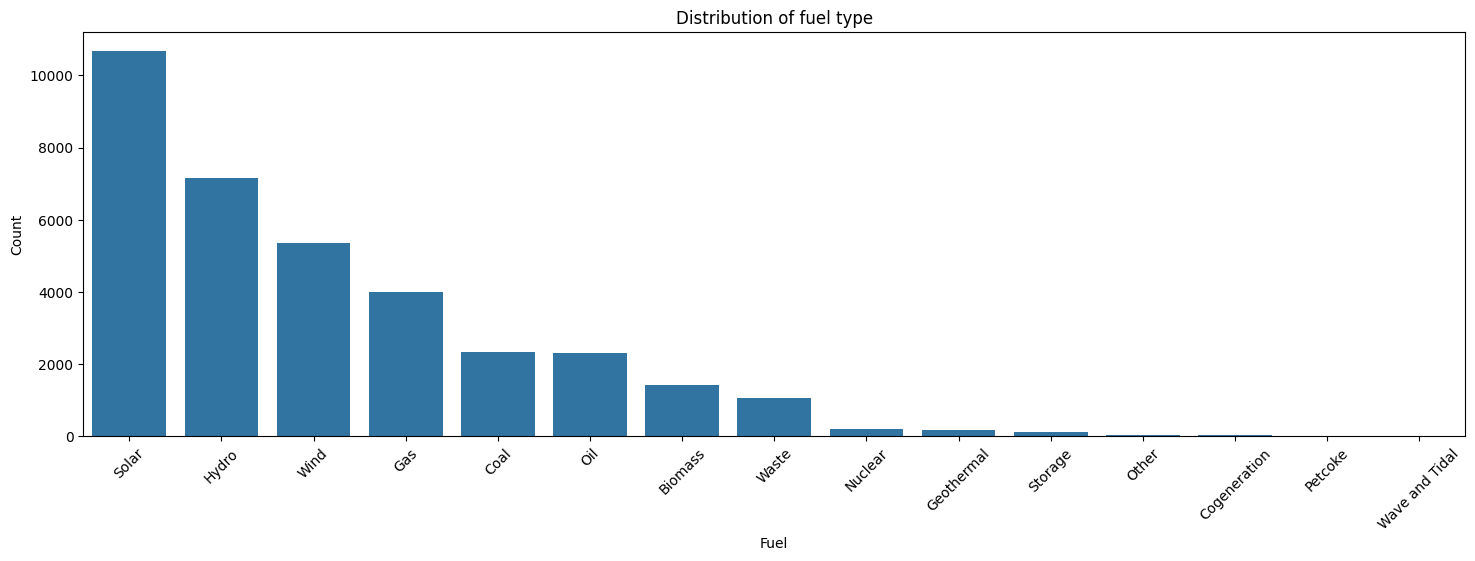

In [44]:
plt.figure(figsize=(15,5))

# Sort the DataFrame by the 'fuel' column
sorted_cdata = cdata['primary_fuel'].value_counts().reset_index().rename(columns={'index': 'country', 'primary_fuel': 'fuel'})

# Create the count plot with sorted data
ax = sns.barplot(data=sorted_cdata, x='fuel', y='count')


plt.xlabel('Fuel')
plt.ylabel('Count')
plt.title("Distribution of fuel type")

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# Statistical Analysis:

In [28]:
mean_energy = cdata[energy_gen_columns].mean()
median_energy = cdata[energy_gen_columns].median()
std__energy = cdata[energy_gen_columns].std()

print("The mean of energy generation is:\n", round(mean_energy,2))
print("The median of energy generation is:\n", median_energy)
print("The standart deviation of energy generation is:\n", round(std__energy,2))

mean_est = cdata[energy_est_columns].mean()
median_est = cdata[energy_est_columns].median()
std__est = cdata[energy_est_columns].std()

print("The mean of energy estimation is:\n", round(mean_est,2))
print("The median of energy estimation is:\n", median_est)
print("The standart deviation of energy estimation is:\n", round(std__est,2))

The mean of energy generation is:
 generation_gwh_2013    592.70
generation_gwh_2014    656.86
generation_gwh_2015    762.37
generation_gwh_2016    693.15
generation_gwh_2017    661.83
generation_gwh_2018    517.32
generation_gwh_2019    423.92
dtype: float64
The median of energy generation is:
 generation_gwh_2013    23.426000
generation_gwh_2014    23.608500
generation_gwh_2015    26.142000
generation_gwh_2016    22.462389
generation_gwh_2017    17.876500
generation_gwh_2018    12.530000
generation_gwh_2019    11.530000
dtype: float64
The standart deviation of energy generation is:
 generation_gwh_2013    2174.83
generation_gwh_2014    2231.46
generation_gwh_2015    2533.46
generation_gwh_2016    2404.52
generation_gwh_2017    2369.30
generation_gwh_2018    1975.30
generation_gwh_2019    1698.51
dtype: float64
The mean of energy estimation is:
 estimated_generation_gwh_2013    239.11
estimated_generation_gwh_2014    242.43
estimated_generation_gwh_2015    235.87
estimated_generation_

In [51]:
primary_fuel = cdata. groupby('primary_fuel')

data_solar = primary_fuel.get_group('Solar')['capacity_mw']
data_hydro = primary_fuel.get_group('Hydro')['capacity_mw']
data_wind = primary_fuel.get_group('Wind')['capacity_mw']
data_gas = primary_fuel.get_group('Gas')['capacity_mw']
data_coal = primary_fuel.get_group('Coal')['capacity_mw']
data_oil = primary_fuel.get_group('Oil')['capacity_mw']
data_bio = primary_fuel.get_group('Biomass')['capacity_mw']
data_waste = primary_fuel.get_group('Waste')['capacity_mw']
data_nuclear = primary_fuel.get_group('Nuclear')['capacity_mw']


results = stats.tukey_hsd(data_solar, data_hydro, data_wind,data_gas,data_coal,data_oil,data_bio, data_waste, data_nuclear)
print(results)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)   -129.515     0.000  -149.325  -109.704
 (0 - 2)    -31.567     0.000   -53.294    -9.840
 (0 - 3)   -355.792     0.000  -379.833  -331.752
 (0 - 4)   -825.923     0.000  -855.569  -796.277
 (0 - 5)    -95.222     0.000  -124.920   -65.523
 (0 - 6)     -6.316     1.000   -42.824    30.192
 (0 - 7)      3.847     1.000   -37.760    45.455
 (0 - 8)  -2074.198     0.000 -2167.879 -1980.517
 (1 - 0)    129.515     0.000   109.704   149.325
 (1 - 2)     97.947     0.000    74.509   121.386
 (1 - 3)   -226.278     0.000  -251.875  -200.681
 (1 - 4)   -696.408     0.000  -727.330  -665.487
 (1 - 5)     34.293     0.017     3.321    65.265
 (1 - 6)    123.199     0.000    85.647   160.750
 (1 - 7)    133.362     0.000    90.836   175.888
 (1 - 8)  -1944.684     0.000 -2038.776 -1850.591
 (2 - 0)     31.567     0.000     9.840    53.294
 (2 - 1)    -97.947     0.000  -

# Time Series Analysis



In [52]:
cdata.columns

Index(['country', 'country_long', 'name', 'capacity_mw', 'latitude',
       'longitude', 'primary_fuel', 'commissioning_year', 'owner', 'source',
       'geolocation_source', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_gwh_2019',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017'],
      dtype='object')

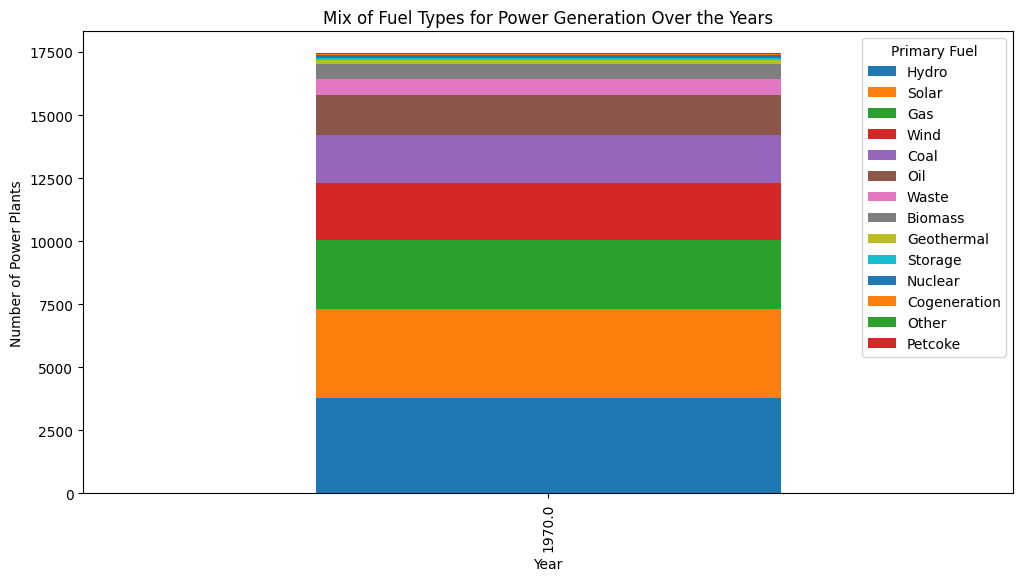

In [53]:
grouped_by_year = cdata.groupby('commissioning_year')

# Count the occurrences of each fuel type for each year
fuel_type_counts_by_year = grouped_by_year['primary_fuel'].value_counts().unstack(fill_value=0)

fuel_type_counts_by_year.plot(kind='bar', stacked=True, figsize=(12, 6))


plt.title('Mix of Fuel Types for Power Generation Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Power Plants')
plt.legend(title='Primary Fuel')

plt.show()

# Advanced Visualization

In [58]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scattergeo(
        locationmode='ISO-3',
        lon=cdata['longitude'],
        lat=cdata['latitude'],
        mode='markers',
        marker=dict(size=5, color='blue'),
        opacity=0.6,
        hoverinfo='text',
        text=cdata['name']  # Display the name of the power plant on hover
    )
)

# Update layout
fig.update_layout(
    title='Power Plants Location',
    geo=dict(
        projection_type='natural earth'
    )
)

# Show the plot
fig.show()


# Matrix Operations in Real-World Context:



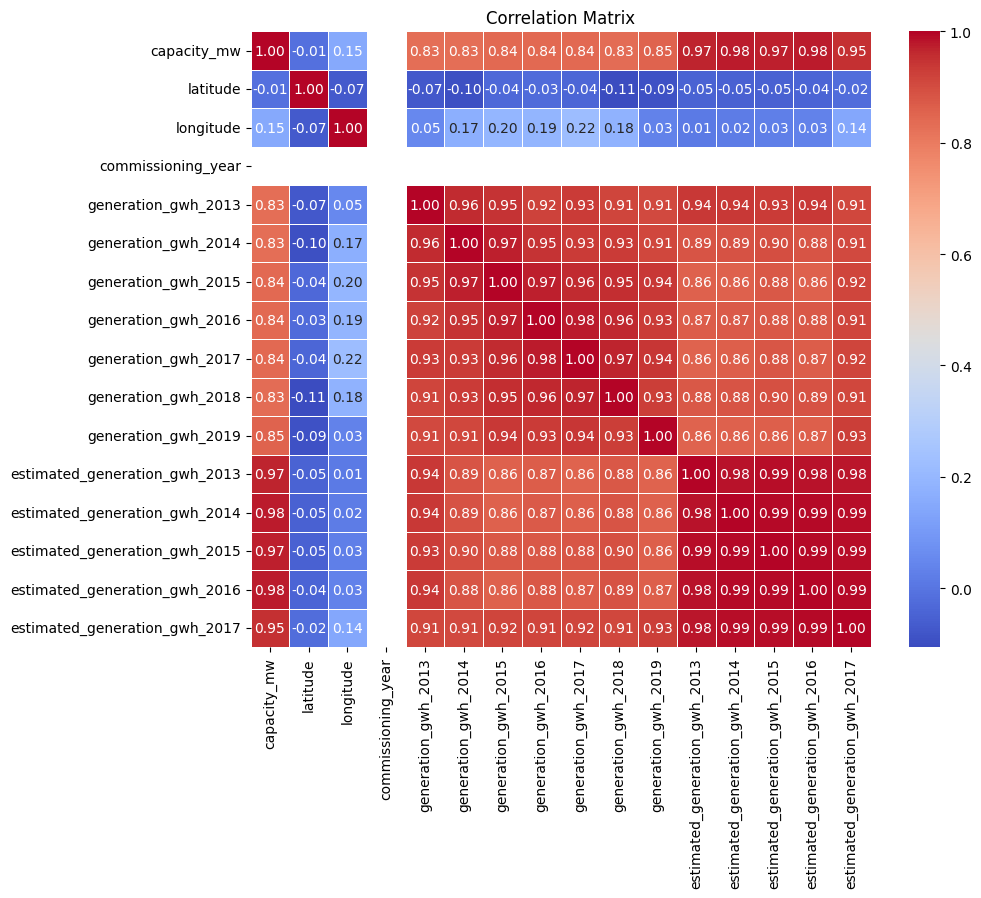

In [60]:
# Selecting only numerical columns
numerical_columns = cdata.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()
